In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.animation import FuncAnimation
import seaborn as sns

In [2]:
def getdata(n):
    # n為產生資料量

    # 給定一個固定的參數，再加上隨機變動值作為雜訊
    # 其雜訊變動值介於 -10 ～ 10 之間
    x = np.arange(-5, 5.1, 10/(n-1))
    y = 3*x + 2 + (np.random.rand(len(x))-0.5)*20
    return x, y

def plot_error(x, y):
# 繪製誤差網格圖 
   
    a = np.arange(-10, 10, 0.01)
    b = np.arange(-10, 10, 0.01)
    mesh = np.meshgrid(a, b)

    sqr_err = 0
    for xs, ys in zip(x, y):
        sqr_err += ((mesh[0]*xs + mesh[1]) - ys) ** 2
    loss = sqr_err/len(x)
    
    plt.contour(mesh[0], mesh[1], loss, 20, cmap=plt.cm.jet)
    plt.xlabel('a')
    plt.ylabel('b')
    plt.axis('scaled')
    plt.title('function loss')
    plt.colorbar()

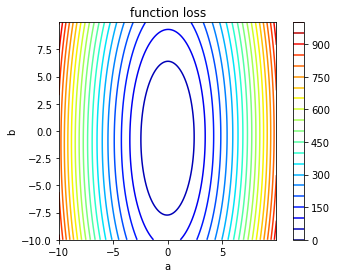

In [26]:
a = 0.33
b = 0.66
x = np.arange(-5, 5, 0.1)
y = a * np.sin(x) - b
# y = a * x + b
plot_error(x,y)

In [27]:
np.random.seed(42)
output_y = y * 0.1 * x
# output_y = 3*x + 2 + (np.random.rand(len(x))-0.5)*20

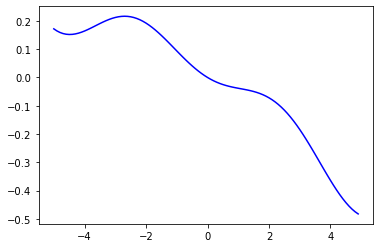

In [28]:
plt.plot(x, output_y, 'b')
# print(x)

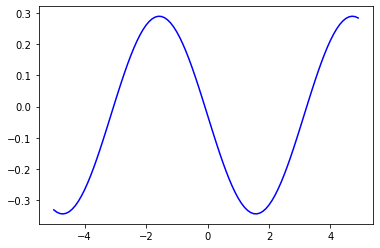

In [32]:
plt.plot(x, predict_y, 'b')

In [29]:
def MSE(predict_y, output_y):
#     mse = 1/len(predict_y) * ((predict_y - output_y)  ** 2)
    mse = (predict_y - output_y)  ** 2
    return np.mean(mse)

def sgd(predict_y, output_y, dy_da, dy_db):
#     sgd_a = 2/len(predict_y) * np.mean((predict_y - output_y) * dy_da)
#     sgd_b = 2/len(predict_y) * np.mean((predict_y - output_y) * dy_db)
    sgd_a = 2 * np.mean((predict_y - output_y) * dy_da)
    sgd_b = 2 * np.mean((predict_y - output_y) * dy_db)
    return sgd_a, sgd_b
def update(a, b, sgd_a, sgd_b, lr):
    a = a - lr * sgd_a
    b = b - lr * sgd_b
    return a, b

-8.902796933430187 8.818521680846489 125.6046073796795 -9.086303184719712
-8.806653406453417 8.640691570152068 121.40457879417728 -8.903892761765148
-8.711557549513378 8.46643650054391 117.3546900214923 -8.725140707452029
-8.617497632217464 8.295684770273043 113.44933430277574 -8.549973740587472
-8.524462061588604 8.128366113875188 109.68311982289231 -8.378320046936928
-8.432439380341133 7.964411673418706 106.05086134642639 -8.210109249868239
-8.34141826518037 7.803753970327927 102.54757218183276 -8.04527238158308
-8.251387525125507 7.64632687777033 99.1684564608018 -7.883741854923954
-8.162336099855498 7.4920655935963065 95.90890172041775 -7.725451435745314
-8.074253058077554 7.34090661382044 92.76447177618061 -7.5703362158374405
-7.987127595917934 7.192787706633481 89.73089987443257 -7.418332586392105
-7.9009490353346825 7.0476478869343815 86.80408211318274 -7.2693782119990855
-7.815706822551989 6.905427391372005 83.98007112075915 -7.123412005162995
-7.731390526515829 6.7660676538862

-2.2675791154712637 0.6703358822396579 3.4291231788634344 -0.7061951419966838
-2.2429481235159914 0.6567420218040383 3.3484126417763935 -0.6920802488251112
-2.2185794036606916 0.6434247624283501 3.2697757660614934 -0.6782501958285423
-2.194470137930834 0.630378521791578 3.1931539651819514 -0.6646992588827371
-2.1706175391301614 0.6175978297595719 3.118490479413323 -0.6514218286444381
-2.147018850494706 0.6050773261354067 3.045730313837702 -0.6384124082523942
-2.123671345350877 0.5928117584548013 2.9748201785768367 -0.6256656110744012
-2.100572326777585 0.5807959798256951 2.9057084311800154 -0.6131761584994434
-2.077719127272334 0.5690249468110972 2.8383450210858543 -0.600938877774029
-2.055109108421246 0.557493717354343 2.7726814360801884 -0.588948699881838
-2.032739660572958 0.5461974487459094 2.708670650675285 -0.5772006574658147
-2.010608202516349 0.5351313956309549 2.646267076338446 -0.5656898827918555
-1.9887121811620458 0.5242909080567724 2.5854265135008605 -0.5544116057532594
-1

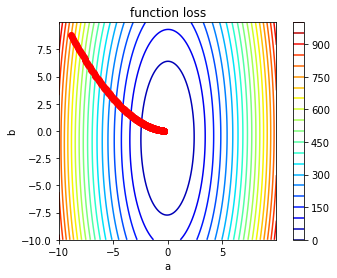

In [31]:
epoch = 300
a = -9
b = 9
for times in range(epoch):
    predict_y = a * np.sin(x) - b
    mse = MSE(predict_y, output_y)
    dy_da = np.sin(x)
    dy_db = -1
#     dy_da = x
#     dy_db = 1
    lr = 0.01
    
#     if mse < 0.001:
#         print(a, b)
#     else:
#         sgd_a, sgd_b = sgd(predict_y, output_y, dy_da, dy_db)
#         a, b = update(a, b, sgd_a, sgd_b, lr)
    sgd_a, sgd_b = sgd(predict_y, output_y, dy_da, dy_db)
    a, b = update(a, b, sgd_a, sgd_b, lr)
    plt.plot(a, b, 'ro')
    print(a, b, mse, np.mean(predict_y))
plot_error(x,y)